# Feature Engineering

In [1]:
import os
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')

In [2]:
chd_data = pd.read_csv("Data/data.csv")
print(chd_data.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [3]:
chd_data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
chd_data.dropna(inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
target = chd_data.TenYearCHD
features = chd_data.drop(columns=["TenYearCHD"])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [7]:
print("Train Size = {}".format(X_train.shape[0]))
print("Test Size = {}".format(X_test.shape[0]))

Train Size = 2560
Test Size = 1098


## Building Features Importance and Selection

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
dtree = DecisionTreeClassifier(random_state=0)
model = LogisticRegression(random_state=0)

In [40]:
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print("Accuracy = {}".format(accuracy_score(y_true=y_test, y_pred=y_pred)*100))

Accuracy = 77.23132969034609


In [41]:
dtree.feature_importances_

array([0.02605082, 0.10555161, 0.03258819, 0.01705179, 0.04277727,
       0.00970994, 0.00390675, 0.00608242, 0.01060432, 0.1247247 ,
       0.16143079, 0.07927629, 0.15389115, 0.0965359 , 0.12981806])

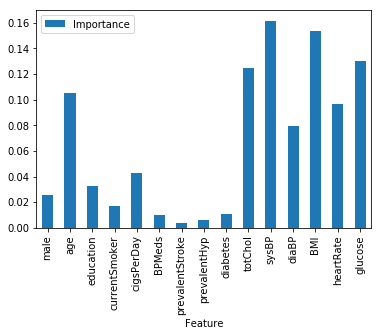

In [42]:
%matplotlib inline
feat_imp = pd.DataFrame(data=dtree.feature_importances_, columns=['Importance'])
feat_imp["Feature"] = X_train.columns
feat_imp.plot.bar(x="Feature", y="Importance")

In [64]:
temp_train = np.array(X_train["sysBP"]).reshape(-1,1)
temp_test = np.array(X_test["sysBP"]).reshape(-1,1)

temp_model = DecisionTreeClassifier(random_state=0)
temp_model.fit(temp_train, y_train)
temp_pred = temp_model.predict(temp_test)

print("Accuracy = {}".format(accuracy_score(y_test, temp_pred)*100))

Accuracy = 83.6976320582878


## PCA

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA().fit(X_train)

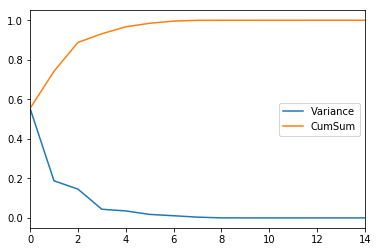

In [59]:
variance_plot = pd.DataFrame(data=pca.explained_variance_ratio_, columns=["Variance"])
variance_plot["CumSum"] = pca.explained_variance_ratio_.cumsum()
variance_plot.plot()

In [60]:
pca = PCA(n_components=6).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [63]:
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print("Accuracy = {}".format(accuracy_score(y_true=y_test, y_pred=y_pred)*100))

Accuracy = 86.0655737704918


<hr>